DISEÑO DE FILTROS DIGITALES
Koraima Torres Diaz
Luis Miguel Ramirez Rueda

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

4.1. Creación de la señal

In [2]:
# creación de x_e, y_e, m_e
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n= np.arange (0,1001,1/Fs) # tiempo
x_e = np.sin (2*np.pi*F0*(n)) #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len (n)) # ruido gausiano
x_e1 = np.sin (2*np.pi*F0*(n+15/Fs)) #potencial con con retraso
y_e = alfa*x_e1+w  # señal adquirida con ruido y retraso.

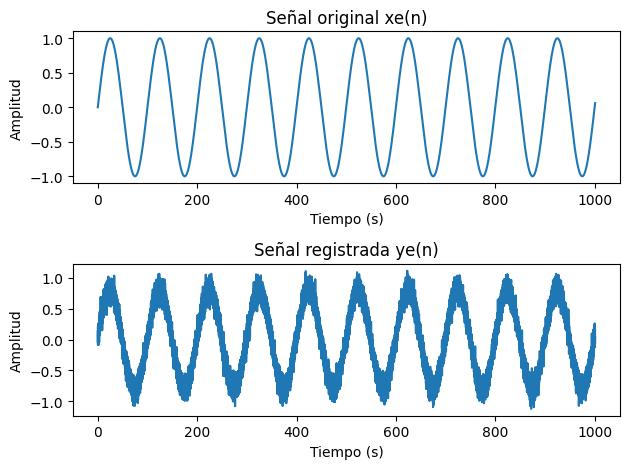

In [3]:
#Gráfica señal original
plt.subplot(2, 1, 1)
plt.plot(n, x_e, label='xe(n)')
plt.title('Señal original xe(n)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfica señal con ruido y retraso
plt.subplot(2, 1, 2)
plt.plot(n, y_e, label='ye(n)')
plt.title('Señal registrada ye(n)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

4.2. Diseño de un filtro

In [4]:
order = 30 # orden filtro
nyquist = Fs/2 # frecuencia de nyquist
wn1 = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist para filtro pasa bajas.
wn2= 7.5/nyquist #frecuencia de corte normalizada respecto nyquist para filtro pasa banda y pasa altas.

# FILTROS FIR 

# Filtro pasa bajas
lowpass =signal.firwin(order+1,wn1, pass_zero ='lowpass',window='hamming') #filtro pasa bajas

# Filtro pasa altas
highpass =signal.firwin(order+1,wn1, pass_zero ='highpass',window='hamming') #filtro pasa altas

# Filtro pasa bandas
bandpass =signal.firwin(order+1,[wn1,wn2], pass_zero ='bandpass',window='hamming') #filtro pasa bandas


Para la creación de un filtro FIR pasa altas o pasa bandas se modifica el parámetro 'pass_zero'. Para el caso del filtro pasa altas, se especifica la frecuencia de corte normalizada wn1 y se establece pass_zero en 'highpass'. Para el filtro pasa banda, se especifica una lista [wn1, wn2] que contenga las frecuencias de corte inferior y superior normalizadas respectivamente. Además, el parámetro pass_zero debe establecerse en 'bandpass'

In [5]:
# FILTROS IIR
order1=10  # Se cambió el orden del filtro para 
# Filtro pasa bajos
b, a = signal.iirfilter(order1, wn1, btype='low', analog=False, ftype='butter')

# Filtro pasa altas
b1, a1 = signal.iirfilter(order1, wn1, btype='highpass', analog=False, ftype='butter')

# Filtro pasa banda
b2, a2 = signal.iirfilter(order1, [wn1,wn2], btype='bandpass', analog='False', ftype='butter') # Filtro pasa bajas


4.3. Filtrado

In [6]:
# FILTRO PASA BAJAS FIR
y_filtfilt_FIR_lowpass = signal.filtfilt (lowpass, 1, x=y_e) # aplicación del comando filtfilt para filtrado pasa bajas FIR
y_lfilter_FIR_lowpass = signal.lfilter (lowpass, 1, x=y_e) # aplicación del comando lfilter para filtrado pasa bajas FIR

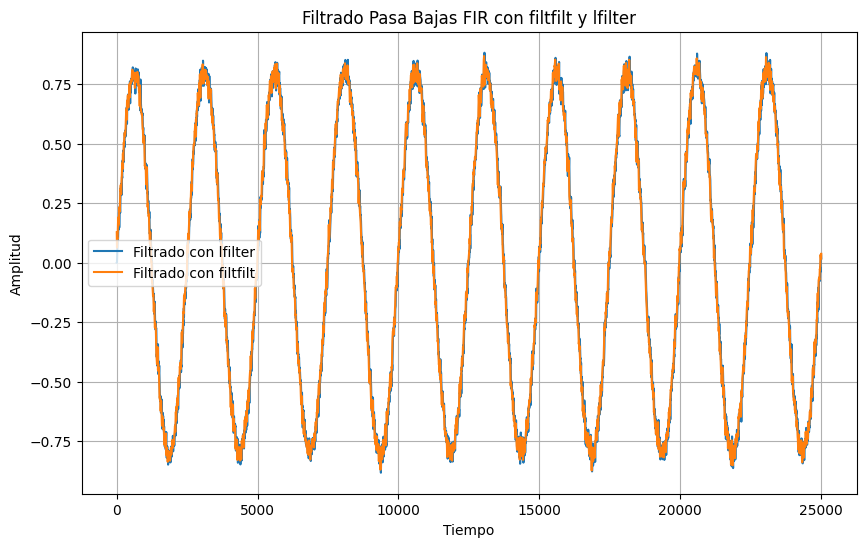

In [7]:
# Gráfica de ambas señales filtradas
plt.figure(figsize=(10, 6))
plt.plot(y_lfilter_FIR_lowpass, label='Filtrado con lfilter')
plt.plot(y_filtfilt_FIR_lowpass, label='Filtrado con filtfilt')
plt.title('Filtrado Pasa Bajas FIR con filtfilt y lfilter')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

En el caso de un filtro FIR,se utiliza solo el numerador, ya que solo tiene ceros en su función de transferencia. Por lo tanto, en la función lfilter o filtfilt, solo se especifican los coeficientes del numerador. El numerador en el contexto de un filtro FIR hace referencia a los coeficientes de la respuesta al impulso del filtro, que determinan cómo se ponderan las muestras de entrada para generar la salida filtrada.
Respecto a cambios con el uso de las funciones de filtrado, se observan diferencias entre el uso de lfilter y filtfilt. Es importante destacar que las diferencias observables no parecen ser relevantes, sin embargo es posible apreciar que con filtfilt se ve mas atenuada la señal, principalmente en los picos. 
La falta de coincidencia entre las salidas filtradas por lfilter y filtfilt puede deberse a que lfilter aplica el filtro una vez en una dirección, mientras que filtfilt aplica el filtro dos veces, una en cada dirección, para producir una salida con una fase más lineal. En cuanto al orden del filtro, se encontró que una de las desventajas del filtro FIR es que necesita un orden mayor respecto a los filtros IIR para cumplir las mismas características. En este caso se encontró adecuado el orden establecido ya que se evidenció la atenuación de ruido que tenía la señal sin generar distorsión aparente [1][2][3].


In [8]:
# FILTRO PASA BAJAS IIR
y_iir_filtfilt_lowpass = signal.filtfilt(b, a, x=y_e) # aplicación del comando filtfilt para filtrado pasa bajas IIR
y_iir_lfilter_lowpass = signal.lfilter(b, a, x=y_e) # aplicación del comando lfilter para filtrado pasa bajas IIR

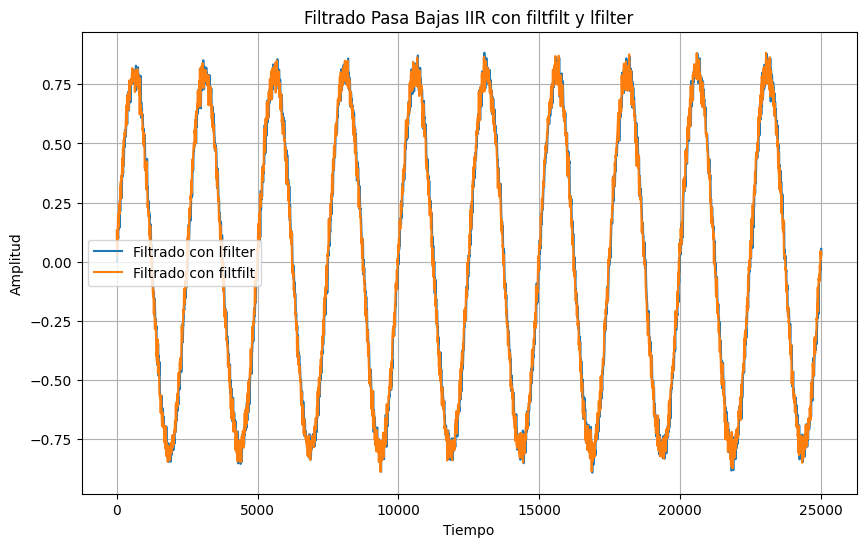

In [9]:
# Gráfica Filtrado Pasa Bajas IIR con filtfilt y lfilter
plt.figure(figsize=(10, 6))
plt.plot(y_iir_lfilter_lowpass, label='Filtrado con lfilter')
plt.plot(y_iir_filtfilt_lowpass, label='Filtrado con filtfilt')
plt.title('Filtrado Pasa Bajas IIR con filtfilt y lfilter')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

los filtros IIR tienen tanto coeficientes en el numerador como en el denominador de su función de transferencia. Esto implica que tienen una parte relacionada con la señal de entrada y otra relacionada con la salida anterior del filtro, lo que implica una retroalimentación en el sistema [2]. Respecto a los filtros FIR, los filtro IIR pueden cumplir las mismas exigencias que los anteriores pero con menos orden de filtro, lo anterior se evidenció previamente, ya que cuando se implementó un orden de 30 se distorsinó completamente la señal y no era posible observar nada. Sin embargo al reducir el orden del filtro a 10, fue posible observar tanto con filtfilt como con lfilt la señal y el ruido evidentemente atenuado, logrando una respuesta similar al filtro FIR.

4.4 Aplicación

In [10]:
from scipy.signal import welch as pwelch
import scipy.signal as signal

· Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.

Importamos el archivo txt que contiene la señal 

In [11]:
data=np.loadtxt('senal_filtros.txt')
data.shape

(60000, 16)

Escojemos el primer canal y graficamos 

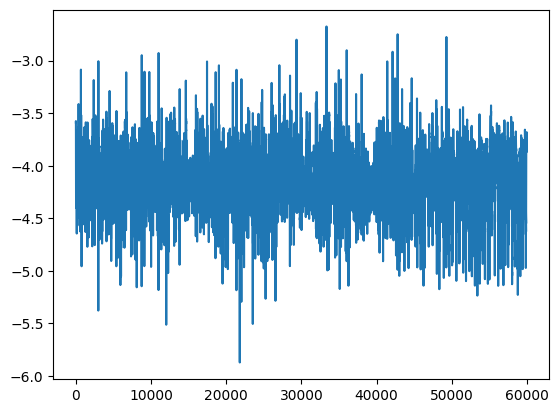

In [12]:
plt.plot(data[:,1])
plt.show()

Realizamos el periodograma de Welch, con un ancho de ventana lo suficientemente grande como para observar suavizado pero no mucha perdida de resolucion espectral

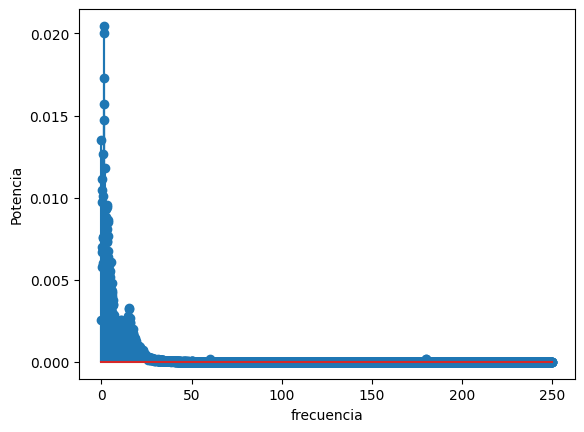

In [13]:
fs=500 # frecuencia de muestreo
nperseg=6000 #ancho de la ventana
noverlap=int(nperseg/2) #solapamiento de las ventanas
f, Pxx=pwelch(data[:,1], fs,'hann', nperseg, noverlap)
#grafícamos frecuencia vs potencia
plt.stem(f, Pxx)
plt.xlabel('frecuencia')
plt.ylabel ('Potencia')
#plt.xlim(0,50)
plt.show()

Acorde a lo que podemos visualizar del periodograma, si hay una leve presencia de ruido electrico, debido al pico evidenciable a 60 Hz

Asignamos datos de primer canal a variable llamada señal

In [14]:
señal=data[:,1]

· Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

Debido a que la mayor concentracion de frecuencias se observa entre 0 y 20 Hz, procedemos a aplicar un filto pasa bajas, de forma que tanto el ruido electrico como las demas frecuencias posiblemente asociadas al ruido, sean filtradas

In [15]:
# FILTROS FIR 
nyquist=500/2
wn=20/nyquist
# Filtro pasa bajas
lowpass =signal.firwin(50+1,wn, pass_zero ='lowpass',window='hamming') #filtro pasa bajas
y_flowpass = signal.filtfilt (b=lowpass, a=1, x=señal) # aplicación del filtro pasa

Grafica donde se hace una ampliacion para poder constatar de mejor manera el efecto del filtro, algo visible debido al aumento del suavizado de la señal

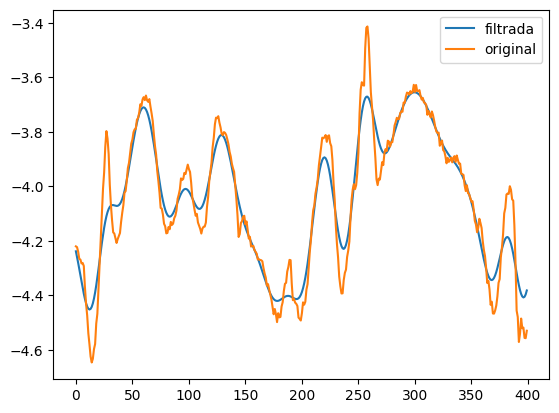

In [16]:
plt.plot(y_flowpass[100:500],label="filtrada")
plt.plot(señal[100:500],label="original")
plt.legend()
plt.show()

Periodograma de Welch de la señal filtrada, se nota el efecto del filtro pasabajas al no visualizar los picos asociados al ruido electrico 

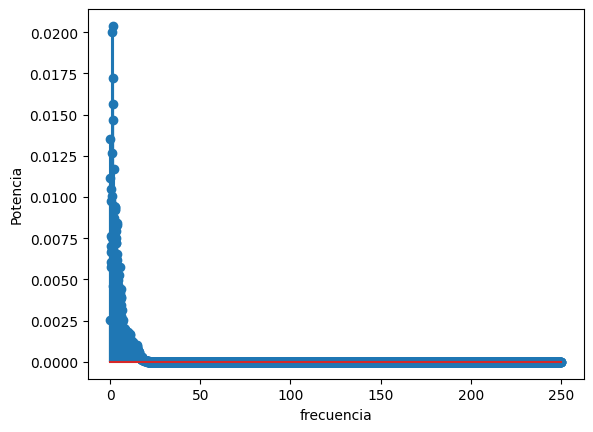

In [17]:
fs=500 # frecuencia de muestreo
nperseg=6000 #ancho de la ventana
noverlap=int(nperseg/2) #solapamiento de las ventanas
f, Pxx=pwelch(y_flowpass, fs,'hann', nperseg, noverlap)
#grafícamos frecuencia vs potencia
plt.stem(f, Pxx)
plt.xlabel('frecuencia')
plt.ylabel ('Potencia')
#plt.xlim(0,50)
plt.show()

CONCLUSIONES

- En las salidas filtradas por lfilter y filtfilt, se notaron diferencias en la atenuación de la señal, particularmente en los picos. La función filtfilt demostró una atenuación más pronunciada, lo que se atribuye a su capacidad para aplicar el filtro en ambas direcciones, produciendo una salida con una fase más lineal.

- Durante el análisis de los filtros IIR, se destacó su capacidad para cumplir con las mismas especificaciones que los filtros FIR pero con un orden de filtro menor. Esta ventaja se demostró cuando un filtro IIR de orden 30 generó distorsión en la señal, mientras que reducir el orden a 10 resultó en una atenuación efectiva del ruido sin distorsión aparente. Esta flexibilidad en el orden del filtro permite una implementación más eficiente y menos compleja en comparación con los filtros FIR.

Bibliografía

[1]	Wordpress.com. [En línea]. Disponible en: https://uvceee.files.wordpress.com/2016/09/digital_signal_processing_principles_algorithms_and_applications_third_edition.pdf. [Consultado: 01-may-2024].
[2]	J. A. Á. Cedillo, K. M. L. Bos, y G. M. Romero, “Implementación de Filtros Digitales Tipo FIR en FPGA”, Org.mx. [En línea]. Disponible en: https://www.scielo.org.mx/pdf/poli/n37/n37a12.pdf. [Consultado: 01-may-2024].
[3]	Wikipedia contributors, “FIR (Finite Impulse Response)”, Wikipedia, The Free Encyclopedia. [En línea]. Disponible en: https://es.wikipedia.org/w/index.php?title=FIR_(Finite_Impulse_Response)&oldid=153095776.
